In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/CVD-5.csv')

In [179]:
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_years
0,18393,1,168.0,62.0,110,80,1,1,0,0,1,0,21.97,50.357290
1,20228,0,156.0,85.0,140,90,3,1,0,0,1,1,34.93,55.381246
2,18857,0,165.0,64.0,130,70,3,1,0,0,0,1,23.51,51.627652
3,17623,1,169.0,82.0,150,100,1,1,0,0,1,1,28.71,48.249144
4,17474,0,156.0,56.0,100,60,1,1,0,0,0,0,23.01,47.841205
5,21914,0,151.0,67.0,120,80,2,2,0,0,0,0,29.38,59.997262
6,22113,0,157.0,93.0,130,80,3,1,0,0,1,0,37.73,60.542094
7,22584,1,178.0,95.0,130,90,3,3,0,0,1,1,29.98,61.831622
8,17668,0,158.0,71.0,110,70,1,1,0,0,1,0,28.44,48.372348
9,19834,0,164.0,68.0,110,60,1,1,0,0,0,0,25.28,54.302533


In [4]:
data.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Men,168.0,62.0,110,80,normal,normal,non-smoker,non-alcoholic,active,yes
1,1,20228,Women,156.0,85.0,140,90,well above normal,normal,non-smoker,non-alcoholic,active,no
2,2,18857,Women,165.0,64.0,130,70,well above normal,normal,non-smoker,non-alcoholic,non-active,no
3,3,17623,Men,169.0,82.0,150,100,normal,normal,non-smoker,non-alcoholic,active,no
4,4,17474,Women,156.0,56.0,100,60,normal,normal,non-smoker,non-alcoholic,non-active,yes


In [5]:
data.describe()

,id,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,69685.000000,69608.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,164.357193,74.202524,128.817286,96.630414
std,28851.302323,2467.251667,8.214289,14.395734,154.011419,188.472530
min,0.000000,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,25006.750000,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,50001.500000,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,74889.250000,21327.000000,170.000000,82.000000,140.000000,90.000000
max,99999.000000,23713.000000,250.000000,200.000000,16020.000000,11000.000000


Data Cleaning

In [6]:
mask_duplicate=data.duplicated()
print(mask_duplicate.sum())

0


converting integer null value into mean

In [7]:
# Replace NaN values with the mean of the column
data.fillna(data.mean(), inplace=True)

# After this operation, check if there are still any NaN values left
print(data.isnull().sum())


id               0
age              0
gender          63
height           0
weight           0
ap_hi            0
ap_lo            0
cholesterol      0
gluc             0
smoke          252
alco            63
active         525
cardio           0
dtype: int64


<ipython-input-7-b3166a9fef17>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(), inplace=True)


drop the Null value

In [8]:
data = data.dropna(axis = 0)

In [9]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Men,168.0,62.0,110,80,normal,normal,non-smoker,non-alcoholic,active,yes
1,1,20228,Women,156.0,85.0,140,90,well above normal,normal,non-smoker,non-alcoholic,active,no
2,2,18857,Women,165.0,64.0,130,70,well above normal,normal,non-smoker,non-alcoholic,non-active,no
3,3,17623,Men,169.0,82.0,150,100,normal,normal,non-smoker,non-alcoholic,active,no
4,4,17474,Women,156.0,56.0,100,60,normal,normal,non-smoker,non-alcoholic,non-active,yes
5,8,21914,Women,151.0,67.0,120,80,above normal,above normal,non-smoker,non-alcoholic,non-active,yes
6,9,22113,Women,157.0,93.0,130,80,well above normal,normal,non-smoker,non-alcoholic,active,yes
7,12,22584,Men,178.0,95.0,130,90,well above normal,well above normal,non-smoker,non-alcoholic,active,no
8,13,17668,Women,158.0,71.0,110,70,normal,normal,non-smoker,non-alcoholic,active,yes
9,14,19834,Women,164.0,68.0,110,60,normal,normal,non-smoker,non-alcoholic,non-active,yes


In [11]:
# Assuming 'gender' is the column name, replace 'gender' with your actual column name
unique_gender_values = data['gender'].unique()

# Print the unique values for the 'gender' column
print(f"Unique values for gender: {unique_gender_values}")


Unique values for gender: ['Men' 'Women' 'wOMen' 'womeN' 'woMEN' 'MeN' 'mEn' 'WOMeN' 'WomEn' 'wOmeN'
 'WOMEN' 'WOmEn' 'WOMEn' 'WOmen' 'WOmeN' 'WoMeN' 'men' 'WomEN' 'MEN'
 'woMen' 'MEn' 'meN' 'WoMen' 'womEn' 'wOMEn' 'woMeN' 'womEN' 'mEN' 'wOmEN'
 'woMEn' 'wOmen' 'WoMEN' 'women' 'WOmEN' 'WoMEn' 'WOMen' 'wOMeN' 'wOmEn'
 'WomeN' 'wOMEN']


In [12]:
import pandas as pd



# Define the standardize_gender function
def standardize_gender(gender):
    if isinstance(gender, str):
        gender_lower = gender.lower()
        if 'wom' in gender_lower or 'woman' in gender_lower:
            return 'Female'
        elif 'men' in gender_lower or 'man' in gender_lower:
            return 'Male'
    return gender

# Apply the function to the gender column in your DataFrame
data['gender'] = data['gender'].apply(standardize_gender)

# Check the results for the entire DataFrame
unique_gender_values_after = data['gender'].unique()
print(unique_gender_values_after)


['Male' 'Female']


In [13]:
unique_gender_values = data['cholesterol'].unique()

# Print the unique values for the 'gender' column
print(f"Unique values for gender: {unique_gender_values}")


Unique values for gender: ['normal' 'well above normal' 'above normal' 'NOrmAL' 'wELL aBOVE norMal'
 'WeLl aBOVE NormAL' 'norMal' 'NOrMAL' 'abOve noRmAL' 'NorMal' 'NOrMal'
 'nORmaL' 'wELl aboVE nOrMAl' 'NoRmAl' 'WeLL AbOvE normAl' 'nORMAl'
 'noRmal' 'NorMaL' 'aboVE NORmaL' 'above NormAL' 'nOrMAl' 'nORmAL'
 'aBOVE nORMAl' 'NOrmaL' 'wElL ABOVE nORMaL' 'noRMAl' 'NoRMAl'
 'ABovE Normal' 'noRmAl' 'NormAl' 'NORMaL' 'ABOvE NORmaL' 'nORmal'
 'wEll abOvE normAL' 'NorMAL' 'NORMal' 'nOrMaL' 'NormAL' 'AbOVE nOrMaL'
 'weLl AbOvE NOrmaL' 'nORmAl' 'normaL' 'WeLL AbOvE nORMaL'
 'WeLl ABOVe nORmAl' 'WElL ABOVe nOrMal' 'WeLL aboVe nOrmaL'
 'WEll ABOVE NOrmal' 'nOrmAl' 'nOrmal' 'norMAL' 'normAl' 'norMaL' 'nORMal'
 'wELL aboVe Normal' 'NORmal' 'WEll aBove noRmal' 'NoRMAL' 'ABove noRMAl'
 'ABOVE nORMal' 'nORMaL' 'NORMAL' 'WeLl aBoVE NoRMAL' 'weLL aboVE nOrMAL'
 'noRmaL' 'AbOve NOrmal' 'noRMal' 'NoRmaL' 'wElL ABoVE noRMAl' 'NOrMaL'
 'ABoVe noRMAl' 'nORMAL' 'wEll aBOvE NoRMAL' 'NorMAl' 'WeLL aBove NormaL'
 '

In [14]:
import pandas as pd


# Define the standardize_gender function
def standardize_gender(cholesterol):
    if isinstance(cholesterol, str):
        cholesterol_lower = cholesterol.lower()
        if 'well above normal' in cholesterol_lower:
            return 'well above normal'
        elif 'above normal' in cholesterol_lower:
            return 'above normal'
        elif  'normal' in cholesterol_lower:
            return 'normal'
    return cholesterol

# Apply the function to the gender column in your DataFrame
data['cholesterol'] = data['cholesterol'].apply(standardize_gender)

# Check the results for the entire DataFrame
unique_gender_values_after = data['cholesterol'].unique()
print(unique_gender_values_after)


['normal' 'well above normal' 'above normal']


In [15]:
unique_gender_values = data['gluc'].unique()

# Print the unique values for the 'gender' column
print(f"Unique values for gender: {unique_gender_values}")

Unique values for gender: ['normal' 'above normal' 'well above normal' 'NOrMAl' 'wEll aBoVe Normal'
 'NoRmAL' 'NOrMaL' 'NOrMAL' 'WElL ABOve NOrMAL' 'noRMal' 'NOrmAl' 'NOrmal'
 'aBOVE NoRmAL' 'NoRmAl' 'NORmAl' 'norMAL' 'ABoVE NoRmal' 'AboVe nORmAl'
 'NorMAL' 'ABOVE NORmAl' 'NOrmaL' 'NOrMal' 'NoRmal' 'NorMaL' 'NORMAl'
 'nOrMal' 'nOrMAL' 'NormAl' 'wELL abOve NORmaL' 'normAL' 'aBOve NOrmaL'
 'noRmAl' 'aBoVE norMaL' 'nOrmAL' 'noRmAL' 'welL aboVe NoRmaL' 'nORmAl'
 'nORMaL' 'NorMal' 'noRmal' 'Normal' 'norMaL' 'NoRMal' 'NORmaL'
 'AbOve NORmAL' 'NORMal' 'weLL aBove NOrmal' 'Well AbOve NorMAl' 'nOrmaL'
 'WELL ABoVE NORmal' 'normaL' 'NoRmaL' 'NORMAL' 'nORmaL' 'norMal'
 'AbovE norMAl' 'nORmAL' 'weLl abOve noRmAl' 'aBOvE NorMAl' 'ABOve NoRmAl'
 'NormaL' 'nORmal' 'norMAl' 'ABOvE NOrmAl' 'NoRMAl' 'nORMal' 'nOrmAl'
 'nORMAL' 'noRMAL' 'well AboVE NorMaL' 'AbOVE nOrMal' 'nOrMAl' 'NoRMAL'
 'Well aBoVE NoRMAL' 'AbOve normAl' 'NorMAl' 'ABove nOrmaL'
 'wElL abovE nOrMaL' 'wEll AbOve NoRmal' 'AboVE nOrMaL' '

In [16]:
import pandas as pd


# Define the standardize_gender function
def standardize_gender(gluc):
    if isinstance(gluc, str):
        gluc_lower = gluc.lower()
        if 'well above normal' in gluc_lower:
            return 'well above normal'
        elif 'above normal' in gluc_lower:
            return 'above normal'
        elif  'normal' in gluc_lower:
            return 'normal'
    return gluc

# Apply the function to the gender column in your DataFrame
data['gluc'] = data['gluc'].apply(standardize_gender)

# Check the results for the entire DataFrame
unique_gender_values_after = data['gluc'].unique()
print(unique_gender_values_after)

['normal' 'above normal' 'well above normal']


In [17]:
unique_gender_values_after = data['smoke'].unique()
print(unique_gender_values_after)

['non-smoker' 'smoker' 'nOn-sMokEr' 'NoN-SmOker' 'nON-SmOker' 'NON-SMoKEr'
 'NOn-SMOKER' 'NOn-smoKER' 'nON-SmOKER' 'non-SMoKeR' 'noN-SmOKer'
 'NOn-sMoKEr' 'nON-SMOKer' 'Non-sMokEr' 'NOn-Smoker' 'nON-SmoKEr'
 'nON-sMoker' 'nON-Smoker' 'Non-sMOKEr' 'SmoKer' 'Non-SMOker' 'NoN-SmOKer'
 'nON-SmOKeR' 'noN-SMOKEr' 'Non-SMokeR' 'noN-sMoKER' 'NON-SmOker'
 'noN-sMOKeR' 'non-sMOkEr' 'noN-SmoKer' 'NoN-SmoKER' 'NoN-sMOKEr'
 'noN-smoker' 'NON-smoKER' 'nON-sMOkER' 'nON-sMOKER' 'noN-SmOKeR'
 'nON-SmokeR' 'NOn-sMOKEr' 'NOn-sMOKeR' 'noN-SMOkEr' 'NON-smokeR'
 'NON-SmokEr' 'Non-SmoKer' 'NON-smokER' 'NoN-smoKer' 'noN-SmoKeR'
 'noN-smOKEr' 'nON-SMOKER' 'nON-sMOker' 'noN-SmoKER' 'nOn-sMOker' 'sMokEr'
 'noN-smoKer' 'non-SmoKEr' 'Non-smoKer' 'NON-SMOKEr' 'non-sMokER'
 'NON-smOker' 'NOn-smOKeR' 'NON-SmokeR' 'NON-smokEr' 'Non-smOKEr'
 'NOn-sMokeR' 'NoN-smOKER' 'NON-SMOKeR' 'NOn-SmokER' 'Non-smoker'
 'NON-SMOker' 'NON-sMokER' 'noN-smoKEr' 'Non-SmOKEr' 'nOn-smoKEr'
 'NOn-SMOkeR' 'non-smoKER' 'Non-SmOKeR' 'NoN-SMOk

In [18]:
def standardize_smoking_status(status):
    if isinstance(status, str):
        # Normalize the string: lowercase and strip leading/trailing whitespace
        normalized_status = status.lower().strip()

        # Debugging: Print the status before and after normalization
        #print(f"Original: '{status}', Normalized: '{normalized_status}'")

        # Check if the status is 'non-smoker'
        if 'non-smoker' in normalized_status:
            return 'non-smoker'
        # Check if the status is 'smoker'
        elif 'smoker' in normalized_status:
            return 'smoker'
    return status

# Apply the function to your DataFrame
data['smoke'] = data['smoke'].apply(standardize_smoking_status)

# Check the results
print(data['smoke'].unique())


['non-smoker' 'smoker']


In [19]:
unique_gender_values_after = data['alco'].unique()
print(unique_gender_values_after)


['non-alcoholic' 'alcoholic' 'nON-aLcohOlIc' 'noN-ALcoHOLiC' 'ALCOhOliC'
 'NOn-aLCoHolic' 'NOn-ALCohoLIC' 'NOn-ALcOHOlIc' 'NON-alcOhOlic'
 'NON-aLcoholic' 'non-ALCohOlIC' 'nON-aLCOHOLiC' 'nOn-AlCOhOliC'
 'alcoHOlic' 'noN-aLCOHOlIc' 'noN-alCohOlic' 'nON-ALCoHOlIc'
 'NOn-alcOhOLIc' 'noN-aLcohoLIc' 'non-alCOHoLic' 'NON-ALcoHOLIC'
 'nON-alcOhOLIC' 'NON-aLCOholiC' 'nOn-ALcOholIc' 'noN-ALcohOLIc'
 'non-aLCOholic' 'NON-aLcOhOLIC' 'NON-aLcOHoLIc' 'NOn-aLcOholic'
 'non-ALCOhoLIC' 'NOn-aLCohOLiC' 'NoN-AlcOHoliC' 'nON-aLcOHoLIc'
 'Non-aLcohOLiC' 'NON-aLcoHolic' 'non-AlCoHolic' 'nON-aLCohoLiC'
 'NOn-alcOHoLIC' 'Non-aLcoHolIc' 'ALCOHoLIC' 'NOn-alcOholic'
 'Non-AlCOHoLIc' 'NoN-aLCoHolIC' 'nON-AlcOHoLIc' 'NOn-alCOHoLic'
 'NON-AlCOHOlic' 'NON-aLCOholic' 'nOn-AlcoHolic' 'noN-AlCohOLIC'
 'Non-ALCOHolIc' 'noN-alCOHoLIC' 'nOn-alcohOLIC' 'NoN-ALcOhOlIC'
 'nOn-aLcoHOLIC' 'nOn-AlCOHOlIC' 'NoN-ALCoHOliC' 'nOn-alcOHOLIC'
 'Non-ALCoholIc' 'NoN-aLcOHOLiC' 'NON-aLcohOLiC' 'noN-AlcOHoLIc'
 'noN-ALCOhOLIC' 'nON-ALC

In [20]:
def standardize_alcoholic_status(status):
    if isinstance(status, str):
        # Normalize the string: lowercase and strip leading/trailing whitespace
        normalized_status = status.lower().strip()

        # Check if the status is 'non-alcoholic'
        if 'non-alcoholic' in normalized_status:
            return 'non-alcoholic'
        # Check if the status is 'alcoholic'
        elif 'alcoholic' in normalized_status:
            return 'alcoholic'
    return status

# Apply the function to your DataFrame
data['alco'] = data['alco'].apply(standardize_alcoholic_status)

# Check the results
print(data['alco'].unique())


['non-alcoholic' 'alcoholic']


In [21]:
unique_gender_values_after = data['active'].unique()
print(unique_gender_values_after)

['active' 'non-active' 'ACTiVE' 'AcTIVE' 'NON-aCtIVE' 'ActiVe' 'aCTive'
 'ACTIVE' 'actIVE' 'aCtiVe' 'aCtIvE' 'actiVe' 'aCtivE' 'NON-aCTiVE'
 'ACTIvE' 'aCtIVE' 'NON-aCtiVe' 'AcTivE' 'NOn-AcTIVE' 'acTIVe'
 'nOn-acTIvE' 'ActIVe' 'aCTIVE' 'ACTiVe' 'nON-AcTIve' 'acTIVE' 'ACtive'
 'AcTiVe' 'AcTiVE' 'ACTIVe' 'AcTIve' 'aCTIve' 'nOn-ActivE' 'AcTIvE'
 'aCtive' 'acTIvE' 'Non-ActIVe' 'Non-ACtive' 'NoN-actiVe' 'aCTivE'
 'aCTIVe' 'aCTIvE' 'aCtIve' 'acTive' 'ActiVE' 'non-ACTiVE' 'Active'
 'aCTiVe' 'actiVE' 'ACtivE' 'ACtIvE' 'ACtIve' 'noN-AcTivE' 'acTiVe'
 'aCtiVE' 'ActIVE' 'aCtIVe' 'NON-actiVe' 'non-aCTiVe' 'NON-ACTiVe'
 'NOn-AcTivE' 'Non-ACtiVe' 'ACTive' 'aCTiVE' 'nON-ACTIVE' 'nON-ACTiVe'
 'acTIve' 'NOn-acTIVE' 'NoN-acTIVE' 'AcTIVe' 'NoN-ACTiVe' 'noN-actIVE'
 'actIVe' 'actIvE' 'NoN-ACTIve' 'actIve' 'ActIve' 'Non-aCtivE'
 'noN-ACTivE' 'noN-ActivE' 'non-aCtIve' 'NON-ActIve' 'nON-acTIVe'
 'NON-actIVE' 'acTivE' 'non-ACtiVe' 'ACtiVE' 'ACtiVe' 'nON-acTiVe'
 'noN-Active' 'activE' 'nON-ACtIve' 'nOn-ACtIve' 

In [22]:
def standardize_active_status(active_status):
    if isinstance(active_status, str):
        # Normalize the string: lowercase and strip leading/trailing whitespace
        normalized_status = active_status.lower().strip()

        # Check if the status is 'non-active'
        if 'non-active' in normalized_status:
            return 'non-active'
        # Check if the status is 'active'
        elif 'active' in normalized_status:
            return 'active'
    return active_status

# Apply the revised function to your DataFrame
data['active'] = data['active'].apply(standardize_active_status)

# Check the results
print(data['active'].unique())


['active' 'non-active']


In [23]:
unique_gender_values_after = data['cardio'].unique()
print(unique_gender_values_after)

['yes' 'no']


In [24]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,Male,168.0,62.0,110,80,normal,normal,non-smoker,non-alcoholic,active,yes
1,1,20228,Female,156.0,85.0,140,90,well above normal,normal,non-smoker,non-alcoholic,active,no
2,2,18857,Female,165.0,64.0,130,70,well above normal,normal,non-smoker,non-alcoholic,non-active,no
3,3,17623,Male,169.0,82.0,150,100,normal,normal,non-smoker,non-alcoholic,active,no
4,4,17474,Female,156.0,56.0,100,60,normal,normal,non-smoker,non-alcoholic,non-active,yes


Calculating BMI

In [25]:
def calculate_bmi(weight, height_cm):
    height_m = height_cm / 100  # Convert cm to m
    bmi = weight / (height_m ** 2)
    return bmi

# Apply the function to each row in the DataFrame.
data['bmi'] = data.apply(lambda row: calculate_bmi(row['weight'], row['height']), axis=1)
data['bmi'] = data['bmi'].round(2)

data.head()
 # Display the relevant columns including BMI

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,Male,168.0,62.0,110,80,normal,normal,non-smoker,non-alcoholic,active,yes,21.97
1,1,20228,Female,156.0,85.0,140,90,well above normal,normal,non-smoker,non-alcoholic,active,no,34.93
2,2,18857,Female,165.0,64.0,130,70,well above normal,normal,non-smoker,non-alcoholic,non-active,no,23.51
3,3,17623,Male,169.0,82.0,150,100,normal,normal,non-smoker,non-alcoholic,active,no,28.71
4,4,17474,Female,156.0,56.0,100,60,normal,normal,non-smoker,non-alcoholic,non-active,yes,23.01


In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

finding outlier

using IQR

In [41]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# data = pd.read_csv('your_file.csv')  # Load your dataset

def find_highest_outliers(df):
    highest_outliers = {}

    # For each feature, find the data points with extreme high values
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        # 1st quartile (25%)
        Q1 = df[col].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[col].quantile(0.75)
        # IQR
        IQR = Q3 - Q1

        # Determine the outlier bounds
        outlier_step = 1.5 * IQR
        upper_bound = Q3 + outlier_step

        # Find the highest outlier for feature col
        highest_outlier = df[df[col] > upper_bound][col].max()

        # Store the highest outlier value for each column if it exists
        if not pd.isnull(highest_outlier):
            highest_outliers[col] = highest_outlier

    return highest_outliers

# Apply the function to the dataset
highest_outliers = find_highest_outliers(data)

print("Highest outlier value for each column:")
for col, value in highest_outliers.items():
    print(f"{col}: {value}")


Highest outlier value for each column:
height: 250.0
weight: 200.0
ap_hi: 16020.0
ap_lo: 11000.0
bmi: 298.67


Z-SCORES

Z-SCORE

In [28]:
import pandas as pd
from scipy.stats import zscore

# Load your dataset
# data = pd.read_csv('path_to_your_file.csv')

# Assuming 'data' is your DataFrame and you have numerical columns like 'age', 'height', etc.
numerical_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi']

# Calculate the Z-score for each column and filter out the outliers
for col in numerical_cols:
    data[col + '_zscore'] = zscore(data[col])
    # Here you could choose a different threshold if +/-3 is too inclusive/exclusive
    data = data[(data[col + '_zscore'] > -3) & (data[col + '_zscore'] < 3)]

# Optionally, you can drop the intermediate Z-score columns if you no longer need them
data.drop([col + '_zscore' for col in numerical_cols], axis=1, inplace=True)

# Now 'data' has had outliers removed based on the Z-score method


<ipython-input-28-f2c29393d63c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_zscore'] = zscore(data[col])
<ipython-input-28-f2c29393d63c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col + '_zscore'] = zscore(data[col])


reducing Outlier using Z-score

In [29]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# data = pd.read_csv('your_file.csv')

std_dev_multiplier = 3
outliers = pd.DataFrame()

for column in data.select_dtypes(include=['float64', 'int64']).columns:
    mean = data[column].mean()
    std_dev = data[column].std()
    upper_limit = mean + (std_dev * std_dev_multiplier)
    lower_limit = mean - (std_dev * std_dev_multiplier)

    # Store outliers
    column_outliers = data[(data[column] > upper_limit) | (data[column] < lower_limit)]
    outliers = outliers.append(column_outliers)

# Remove duplicates from the outliers DataFrame
outliers.drop_duplicates(inplace=True)

# Remove the outliers from the original dataset
data_cleaned = data.copy()
data_cleaned.drop(outliers.index, inplace=True)


<ipython-input-29-2e44487724bc>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-29-2e44487724bc>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-29-2e44487724bc>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-29-2e44487724bc>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers = outliers.append(column_outliers)
<ipython-input-29-2e44487724bc>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version

Comparing original value after Outlier reducing

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your original DataFrame and 'data_cleaned' is after removing outliers

# Descriptive statistics comparison
original_stats = data.describe()
cleaned_stats = data_cleaned.describe()

print("Original Data Statistics:\n", original_stats)
print("\nCleaned Data Statistics:\n", cleaned_stats)

# Shape comparison
print("\nOriginal Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)

# Record count
original_count = data.shape[0]
cleaned_count = data_cleaned.shape[0]
print(f"\nNumber of records removed: {original_count - cleaned_count}")




Original Data Statistics:
                  id           age        gender        height        weight  \
count  64707.000000  64707.000000  64707.000000  64707.000000  64707.000000   
mean   49976.083731  19451.261007      0.348757    164.450692     72.921357   
std    28853.852969   2468.740337      0.476581      7.557460     12.405309   
min        0.000000  14275.000000      0.000000    142.000000     35.450000   
25%    24987.500000  17638.000000      0.000000    159.000000     65.000000   
50%    50029.000000  19695.000000      0.000000    165.000000     71.000000   
75%    74864.500000  21314.000000      1.000000    170.000000     80.000000   
max    99998.000000  23713.000000      1.000000    187.000000    111.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  64707.000000  64707.000000  64707.000000  64707.000000  64707.000000   
mean     125.621927     80.905404      1.353316      1.218632      0.087131   
std       15.119455     

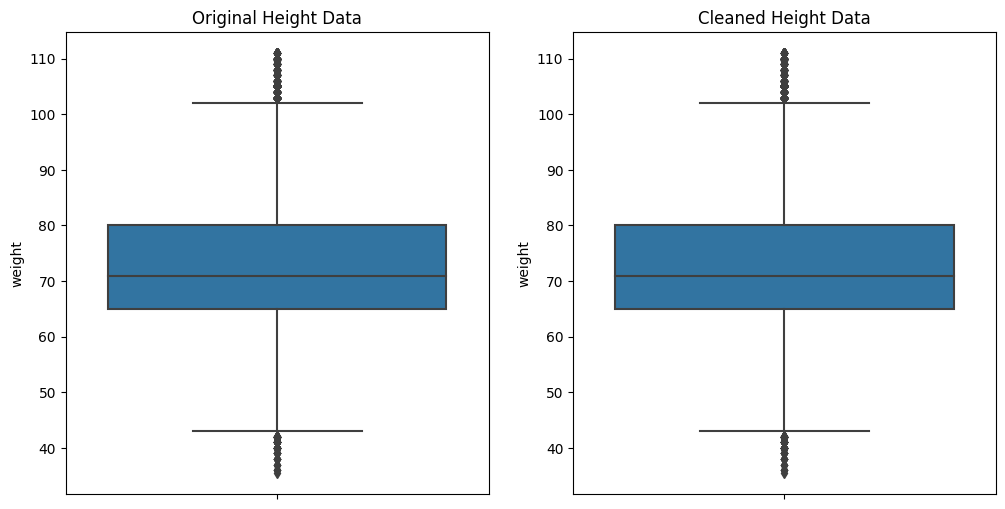

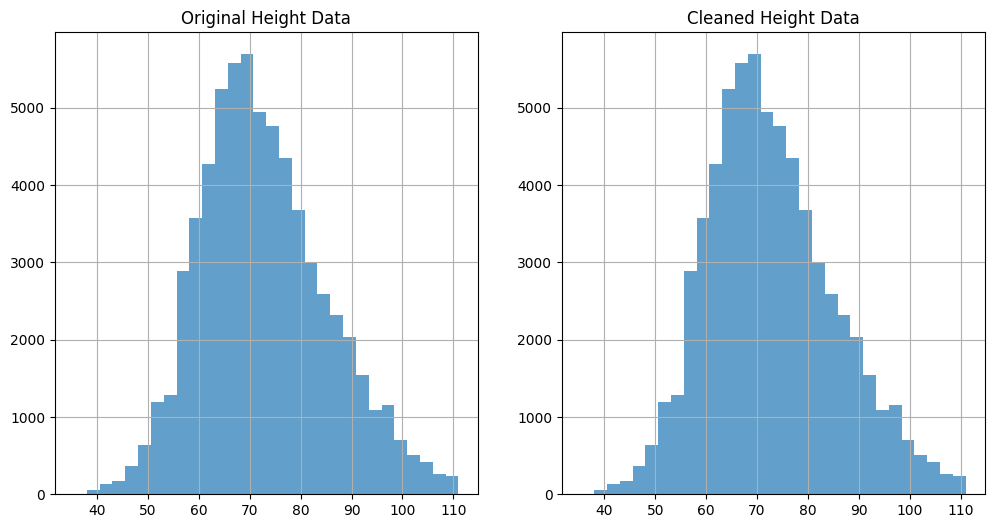

In [123]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['weight'])
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['weight'])
plt.title('Cleaned Height Data')
plt.show()

# Histogram comparison for the same column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['weight'].hist(bins=30, alpha=0.7)
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
data_cleaned['weight'].hist(bins=30, alpha=0.7)
plt.title('Cleaned Height Data')
plt.show()

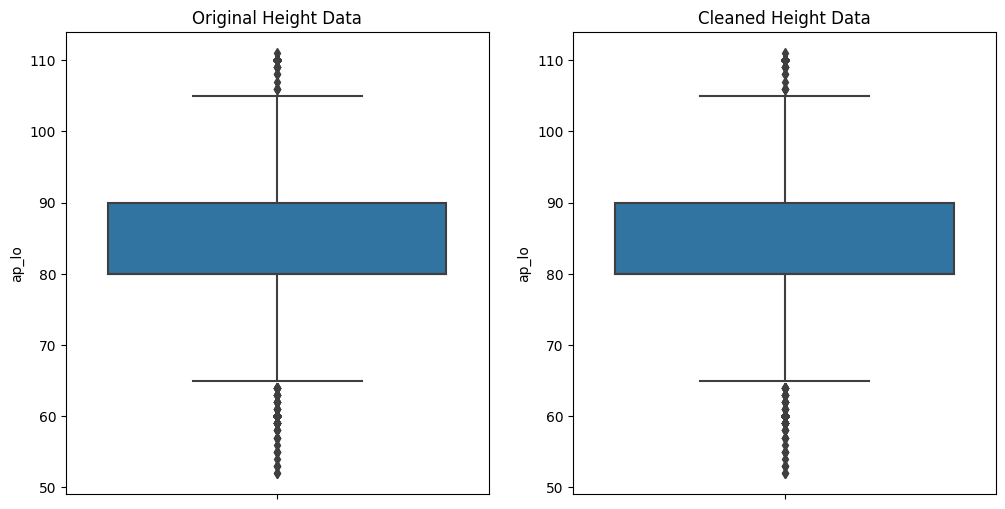

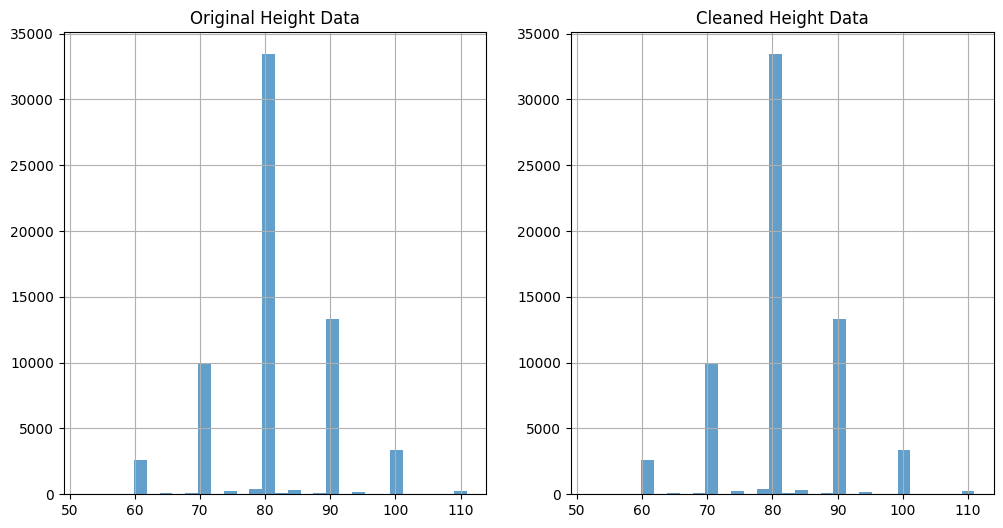

In [124]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['ap_lo'])
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['ap_lo'])
plt.title('Cleaned Height Data')
plt.show()

# Histogram comparison for the same column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['ap_lo'].hist(bins=30, alpha=0.7)
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
data_cleaned['ap_lo'].hist(bins=30, alpha=0.7)
plt.title('Cleaned Height Data')
plt.show()


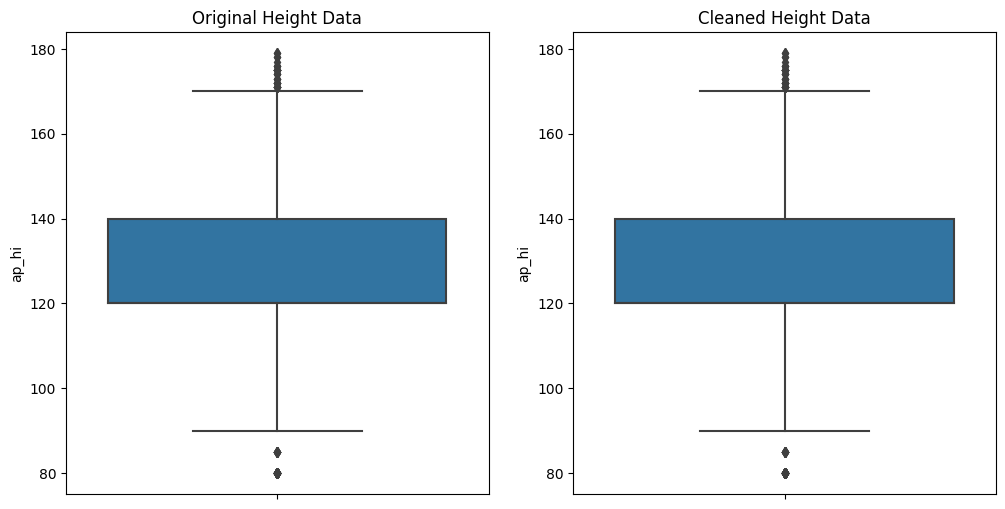

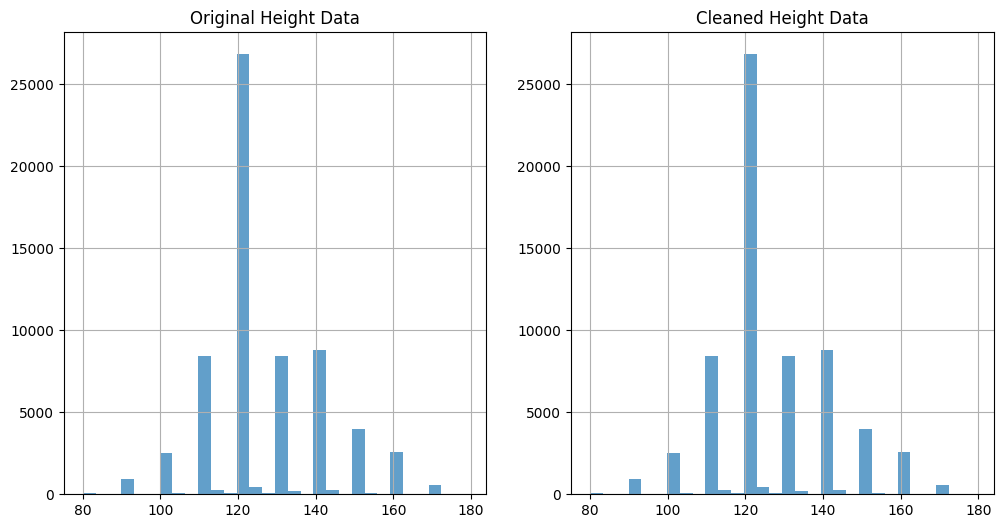

In [125]:

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['ap_hi'])
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['ap_hi'])
plt.title('Cleaned Height Data')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['ap_hi'].hist(bins=30, alpha=0.7)
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
data_cleaned['ap_hi'].hist(bins=30, alpha=0.7)
plt.title('Cleaned Height Data')
plt.show()

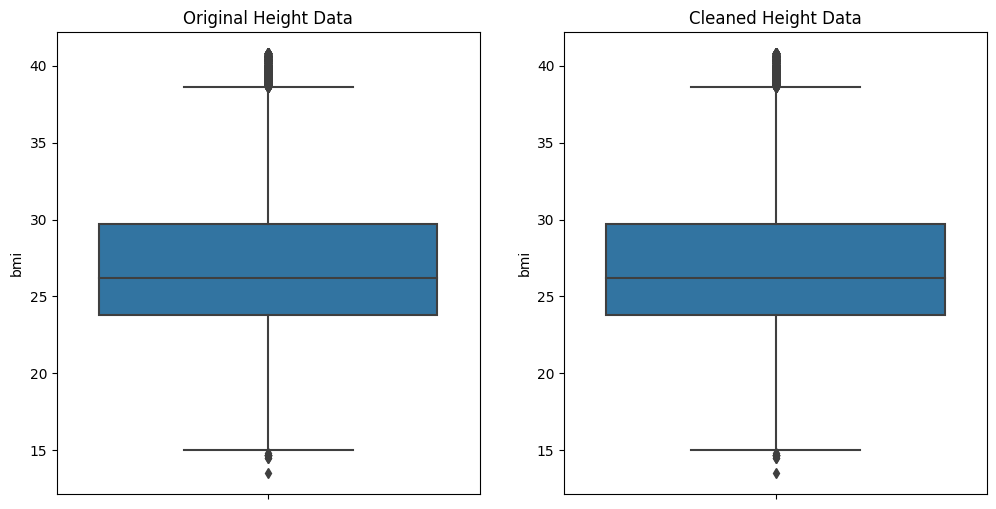

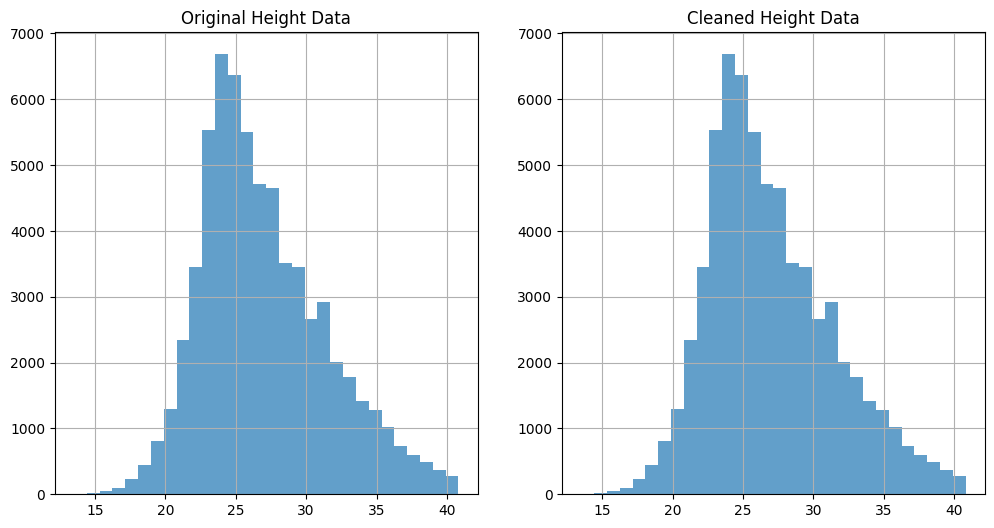

In [126]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['bmi'])
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
sns.boxplot(y=data_cleaned['bmi'])
plt.title('Cleaned Height Data')
plt.show()

# Histogram comparison for the same column
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
data['bmi'].hist(bins=30, alpha=0.7)
plt.title('Original Height Data')

plt.subplot(1, 2, 2)
data_cleaned['bmi'].hist(bins=30, alpha=0.7)
plt.title('Cleaned Height Data')
plt.show()

In [127]:
del data['id']

In [128]:
data = data_cleaned.copy()


In [130]:
del data['id']

In [131]:
data.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,Male,168.0,62.0,110,80,normal,normal,non-smoker,non-alcoholic,active,yes,21.97
1,20228,Female,156.0,85.0,140,90,well above normal,normal,non-smoker,non-alcoholic,active,no,34.93
2,18857,Female,165.0,64.0,130,70,well above normal,normal,non-smoker,non-alcoholic,non-active,no,23.51
3,17623,Male,169.0,82.0,150,100,normal,normal,non-smoker,non-alcoholic,active,no,28.71
4,17474,Female,156.0,56.0,100,60,normal,normal,non-smoker,non-alcoholic,non-active,yes,23.01
5,21914,Female,151.0,67.0,120,80,above normal,above normal,non-smoker,non-alcoholic,non-active,yes,29.38
6,22113,Female,157.0,93.0,130,80,well above normal,normal,non-smoker,non-alcoholic,active,yes,37.73
7,22584,Male,178.0,95.0,130,90,well above normal,well above normal,non-smoker,non-alcoholic,active,no,29.98
8,17668,Female,158.0,71.0,110,70,normal,normal,non-smoker,non-alcoholic,active,yes,28.44
9,19834,Female,164.0,68.0,110,60,normal,normal,non-smoker,non-alcoholic,non-active,yes,25.28


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64707 entries, 0 to 69998
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          64707 non-null  int64  
 1   gender       64707 non-null  object 
 2   height       64707 non-null  float64
 3   weight       64707 non-null  float64
 4   ap_hi        64707 non-null  int64  
 5   ap_lo        64707 non-null  int64  
 6   cholesterol  64707 non-null  object 
 7   gluc         64707 non-null  object 
 8   smoke        64707 non-null  object 
 9   alco         64707 non-null  object 
 10  active       64707 non-null  object 
 11  cardio       64707 non-null  object 
 12  bmi          64707 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 8.9+ MB


data visualization

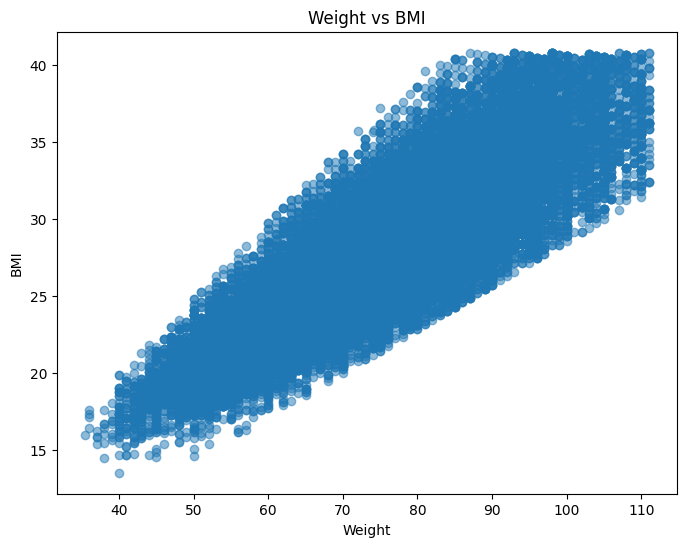

In [163]:
plt.figure(figsize=(8, 6))
plt.scatter(data['weight'], data['bmi'], alpha=0.5)
plt.title('Weight vs BMI')
plt.xlabel('Weight')
plt.ylabel('BMI')
plt.show()


In [164]:
data.head(5)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,1,168.0,62.0,110,80,1,1,0,0,1,0,21.97
1,20228,0,156.0,85.0,140,90,3,1,0,0,1,1,34.93
2,18857,0,165.0,64.0,130,70,3,1,0,0,0,1,23.51
3,17623,1,169.0,82.0,150,100,1,1,0,0,1,1,28.71
4,17474,0,156.0,56.0,100,60,1,1,0,0,0,0,23.01


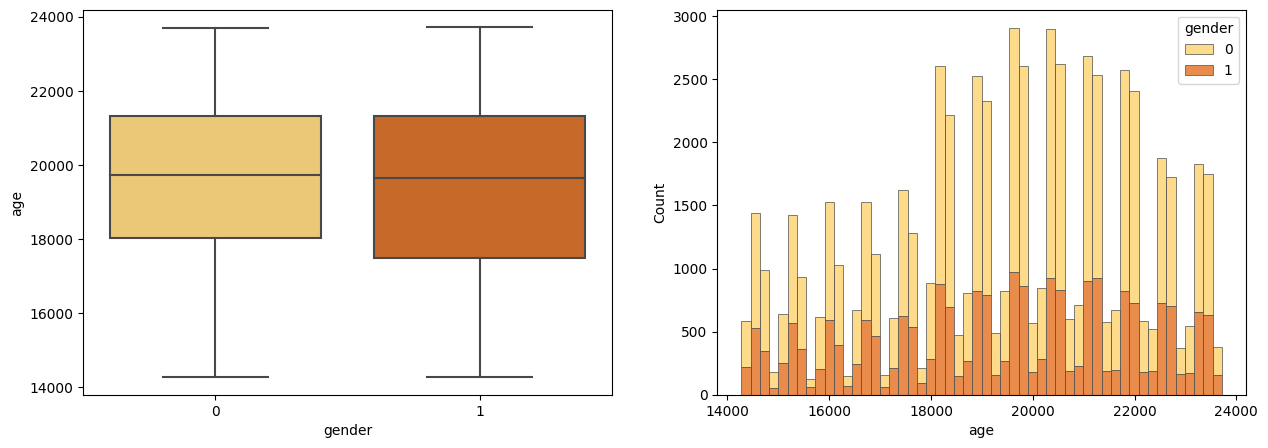

In [167]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "gender", y = "age", palette = "YlOrBr", data = data, ax = ax[0])
sns.histplot(data, x = "age", hue = "gender", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

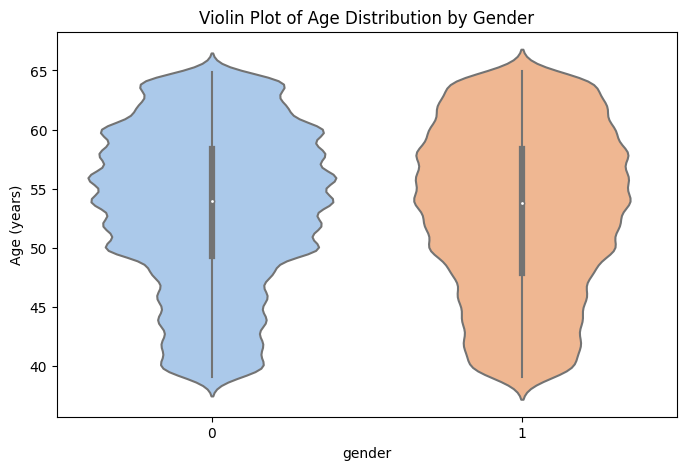

In [168]:
data['age_years'] = data['age'] / 365.25
plt.figure(figsize=(8, 5))
sns.violinplot(x='gender', y='age_years', data=data, palette='pastel', split=True)
plt.title('Violin Plot of Age Distribution by Gender')
plt.ylabel('Age (years)')
plt.show()

<ipython-input-169-e11601244dcd>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='active', y='ap_hi', data=data, palette='pastel', ci=None)


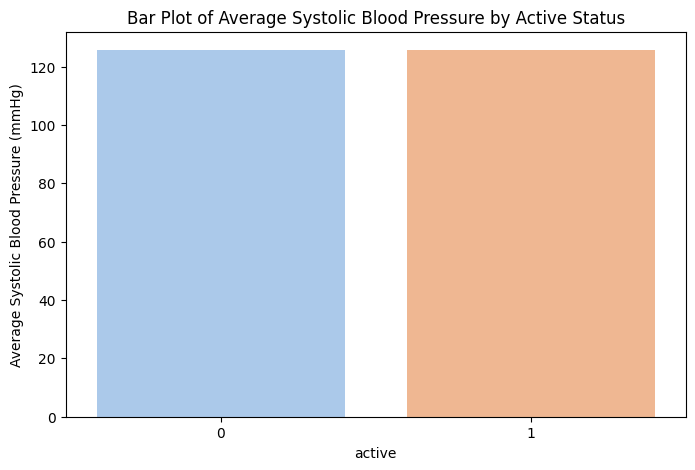

In [169]:
plt.figure(figsize=(8, 5))
sns.barplot(x='active', y='ap_hi', data=data, palette='pastel', ci=None)
plt.title('Bar Plot of Average Systolic Blood Pressure by Active Status')
plt.ylabel('Average Systolic Blood Pressure (mmHg)')
plt.show()

In [170]:
!pip install joypy


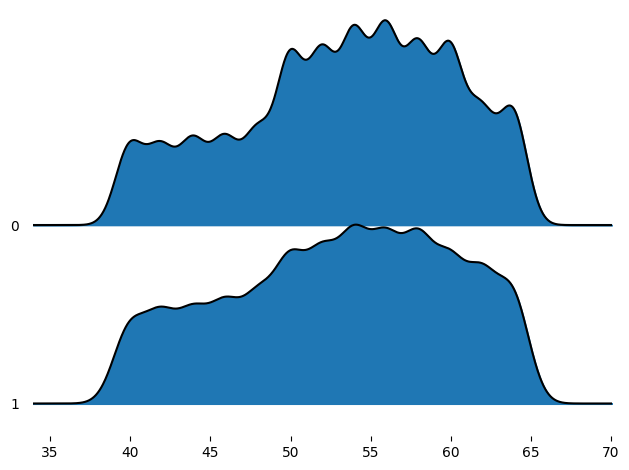

In [171]:
import matplotlib.pyplot as plt
from joypy import joyplot

# Assuming 'data' is your DataFrame and 'age_years' and 'gender' are columns in it
fig, axes = joyplot(data, by='gender', column='age_years')
plt.show()


Converting data into Categorical data

In [133]:
data['gender'] = data['gender'].replace({ 'Female':0, 'Male':1})

In [134]:
data['cholesterol'] = data['cholesterol'].replace({ 'normal':1, 'above normal':2,'well above normal':3})

In [135]:
data['gluc'] = data['gluc'].replace( {'normal':1, 'above normal':2,'well above normal':3})

In [136]:
data['smoke'] = data['smoke'].replace({ 'non-smoker':0, 'smoker':1})

In [137]:
data['alco'] = data['alco'].replace({ 'non-alcoholic':0, 'alcoholic':1})

In [138]:
data['active'] = data['active'].replace({'non-active':0, 'active':1})

In [139]:
data['cardio'] = data['cardio'].replace({'yes':0, 'no':1})

In [140]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,1,168.0,62.0,110,80,1,1,0,0,1,0,21.97
1,20228,0,156.0,85.0,140,90,3,1,0,0,1,1,34.93
2,18857,0,165.0,64.0,130,70,3,1,0,0,0,1,23.51
3,17623,1,169.0,82.0,150,100,1,1,0,0,1,1,28.71
4,17474,0,156.0,56.0,100,60,1,1,0,0,0,0,23.01


In [141]:
X=data.drop('cardio',axis=1)
y=data.cardio

In [142]:
X.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,18393,1,168.0,62.0,110,80,1,1,0,0,1,21.97
1,20228,0,156.0,85.0,140,90,3,1,0,0,1,34.93
2,18857,0,165.0,64.0,130,70,3,1,0,0,0,23.51
3,17623,1,169.0,82.0,150,100,1,1,0,0,1,28.71
4,17474,0,156.0,56.0,100,60,1,1,0,0,0,23.01


Feature Selection -Correlation

Pearson Correlation

In [143]:
from sklearn.model_selection import train_test_split



In [144]:
X_train, X_test, Y_train,Y_test  = train_test_split(X,y,test_size = 0.30, random_state = 600, shuffle = True)
X_train.shape

(45294, 12)

In [145]:
Y_train = Y_train.ravel()

In [146]:
X_train.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
age,1.000000,-0.023884,-0.080804,0.063566,0.215077,0.155868,0.150862,0.096913,-0.048245,-0.026929,-0.015869,0.113600
gender,-0.023884,1.000000,0.516111,0.180200,0.061396,0.069208,-0.036746,-0.025067,0.337200,0.168928,0.005194,-0.109698
height,-0.080804,0.516111,1.000000,0.347537,0.018597,0.037150,-0.051550,-0.023567,0.191602,0.093663,-0.011003,-0.204718
weight,0.063566,0.180200,0.347537,1.000000,0.249053,0.237129,0.134263,0.092148,0.066519,0.067469,-0.019180,0.842809
ap_hi,0.215077,0.061396,0.018597,0.249053,1.000000,0.721278,0.190106,0.082960,0.020037,0.029301,0.002892,0.249731
ap_lo,0.155868,0.069208,0.037150,0.237129,0.721278,1.000000,0.155771,0.065641,0.022468,0.034050,0.000721,0.226568
cholesterol,0.150862,-0.036746,-0.051550,0.134263,0.190106,0.155771,1.000000,0.448494,0.013069,0.033665,0.009582,0.167973
gluc,0.096913,-0.025067,-0.023567,0.092148,0.082960,0.065641,0.448494,1.000000,-0.008588,0.009965,-0.010038,0.108511
smoke,-0.048245,0.337200,0.191602,0.066519,0.020037,0.022468,0.013069,-0.008588,1.000000,0.341766,0.026281,-0.040193
alco,-0.026929,0.168928,0.093663,0.067469,0.029301,0.034050,0.033665,0.009965,0.341766,1.000000,0.023324,0.015810


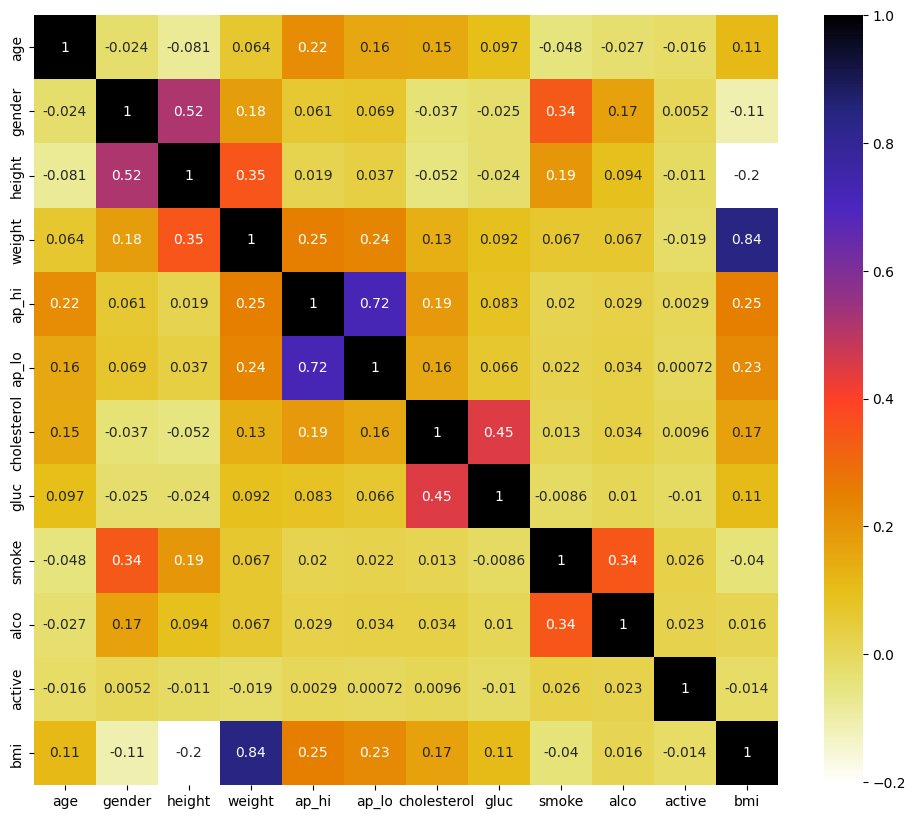

In [147]:
import seaborn as sns
plt.figure(figsize=(12,10))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [148]:
def correlation(dataset, threshold):
    col_corr = set()  # Set to hold the names of highly correlated columns
    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Absolute coeff value
                colname = corr_matrix.columns[i]  # Get the name of the column
                col_corr.add(colname)

    return col_corr


In [149]:
def correlation(data,threshold):
  col_corr=set()
  corr_matrix=data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs (corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
    return col_corr

In [74]:
corr_features=correlation(X_train,0.7)
len(set(corr_features))

2

In [75]:
corr_features

{'ap_lo', 'bmi'}

Feature selection using Information Gain

In [150]:
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X' is your feature set and 'y' is your target variable
mutual_info = mutual_info_classif(X_train, Y_train)

# If you want to view the mutual information scores alongside feature names:
mutual_info_series = pd.Series(mutual_info, index=X.columns)
print(mutual_info_series.sort_values(ascending=False))


ap_hi          0.115085
ap_lo          0.072401
age            0.031341
cholesterol    0.024584
bmi            0.018285
weight         0.016754
active         0.007321
gluc           0.005509
height         0.002425
smoke          0.001620
gender         0.000023
alco           0.000000
dtype: float64


<Axes: >

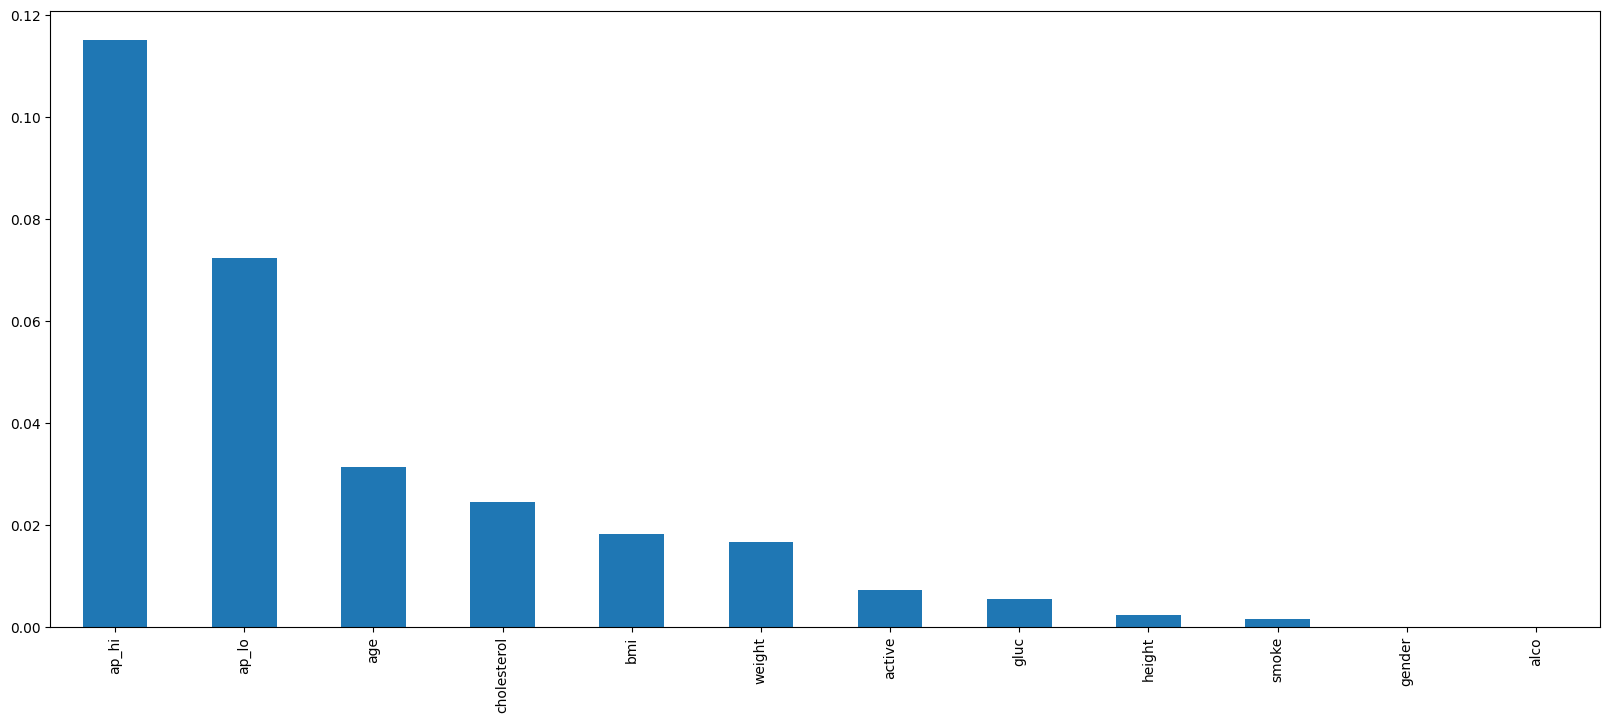

In [151]:
mutual_info_series.sort_values(ascending=False).plot.bar(figsize=(20,8))


In [152]:
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

# Create SelectPercentile object
# Pass mutual_info_classif as the scoring function, not the scores themselves
selected_top_columns = SelectPercentile(mutual_info_classif, percentile=70)

# Fit to the training data
# Ensure to fill NaN values as mutual_info_classif cannot handle NaNs
selected_top_columns.fit(X_train.fillna(0), Y_train)

# Get the columns that were selected
selected_features = X_train.columns[selected_top_columns.get_support()]

print(selected_features)


Index(['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'active',
       'bmi'],
      dtype='object')


In [153]:
X_train.drop(columns=['gender','smoke','alco'])
X_test.drop(columns=['gender','smoke','alco'])

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,bmi
11009,16755,168.0,74.0,120,80,1,1,1,26.22
57172,19170,167.0,95.0,130,80,1,1,1,34.06
5503,18399,169.0,69.0,140,90,1,1,1,24.16
50815,15794,158.0,64.0,120,80,1,2,1,25.64
46283,20630,176.0,63.0,120,80,1,1,1,20.34
...,...,...,...,...,...,...,...,...,...
65863,15571,171.0,71.0,120,80,1,1,1,24.28
13167,21986,173.0,70.0,120,90,1,1,1,23.39
20423,17023,163.0,79.0,110,70,1,1,1,29.73
41172,15302,160.0,57.0,90,60,1,1,1,22.27


Modeling

In [154]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = [3, 5, 10]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    target_pred = knn.predict(X_test)
#     accuracy = round(np.mean(target_test==target_pred ) * 100, 2)
    accuracy = accuracy_score(Y_test,target_pred )
    print(f'Accuracy of model with k = {k}: {accuracy}%')
    print('')

Accuracy of model with k = 3: 0.6634729305104826%

Accuracy of model with k = 5: 0.6789780044300211%

Accuracy of model with k = 10: 0.6944315664760727%



In [155]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


In [156]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7138000309071241


In [172]:
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      9945
           1       0.75      0.62      0.68      9468

    accuracy                           0.71     19413
   macro avg       0.72      0.71      0.71     19413
weighted avg       0.72      0.71      0.71     19413

Confusion Matrix:
 [[7980 1965]
 [3591 5877]]


In [173]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
import matplotlib.pyplot as plt

In [174]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = DT_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6299387008705507


In [159]:
print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      9945
           1       0.75      0.62      0.68      9468

    accuracy                           0.71     19413
   macro avg       0.72      0.71      0.71     19413
weighted avg       0.72      0.71      0.71     19413

Confusion Matrix:
 [[7980 1965]
 [3591 5877]]


In [175]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

In [176]:
print(confusion_matrix(Y_test, rfc_pred))
print('\n')
print("\nClassification Report for RandomForestClassifier\n" ,classification_report(Y_test, rfc_pred))

[[7409 2536]
 [3020 6448]]



Classification Report for RandomForestClassifier
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      9945
           1       0.72      0.68      0.70      9468

    accuracy                           0.71     19413
   macro avg       0.71      0.71      0.71     19413
weighted avg       0.71      0.71      0.71     19413



In [177]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, Y_train)
svm_pred = model.predict(X_test)

In [178]:
print(confusion_matrix(Y_test, rfc_pred))
print('\n')
print("\nClassification Report for Support Vector Machine\n" ,classification_report(Y_test, rfc_pred))

[[7409 2536]
 [3020 6448]]



Classification Report for Support Vector Machine
               precision    recall  f1-score   support

           0       0.71      0.74      0.73      9945
           1       0.72      0.68      0.70      9468

    accuracy                           0.71     19413
   macro avg       0.71      0.71      0.71     19413
weighted avg       0.71      0.71      0.71     19413



In [110]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
log_pred = logmodel.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
print(confusion_matrix(Y_test, log_pred))
print('\n')
print("\nClassification Report for Logistic Regression\n" ,classification_report(Y_test, log_pred))

[[7643 2302]
 [3355 6113]]



Classification Report for Logistic Regression
               precision    recall  f1-score   support

           0       0.69      0.77      0.73      9945
           1       0.73      0.65      0.68      9468

    accuracy                           0.71     19413
   macro avg       0.71      0.71      0.71     19413
weighted avg       0.71      0.71      0.71     19413



In [116]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier(n_estimators = 100)
abc.fit(X_train, Y_train)
abc_pred = abc.predict(X_test)

In [118]:
print(confusion_matrix(Y_test, abc_pred))
print('\n')
print("\nClassification Report for AdaBoostClassifier\n" ,classification_report(Y_test, abc_pred))

[[8120 1825]
 [3454 6014]]



Classification Report for AdaBoostClassifier
               precision    recall  f1-score   support

           0       0.70      0.82      0.75      9945
           1       0.77      0.64      0.69      9468

    accuracy                           0.73     19413
   macro avg       0.73      0.73      0.72     19413
weighted avg       0.73      0.73      0.73     19413



In [119]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators = 100)
gbc.fit(X_train, Y_train)
gbc_pred = gbc.predict(X_test)

In [121]:
print(confusion_matrix(Y_test, gbc_pred))
print('\n')
print("\nClassification Report for GradientBoostingClassifier\n" ,classification_report(Y_test, gbc_pred))

[[7919 2026]
 [3150 6318]]



Classification Report for GradientBoostingClassifier
               precision    recall  f1-score   support

           0       0.72      0.80      0.75      9945
           1       0.76      0.67      0.71      9468

    accuracy                           0.73     19413
   macro avg       0.74      0.73      0.73     19413
weighted avg       0.74      0.73      0.73     19413

